In [285]:
 %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [286]:
city_data = pd.read_csv("Resources/city_data.csv")

In [287]:
ride_data = pd.read_csv("Resources/ride_data.csv")

In [288]:
merged_dataset = pd.merge(ride_data, city_data, how="left", on=["city", "city"])
merged_dataset.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [289]:
average_per_city=merged_dataset.groupby(["city"]).mean()["fare"]

In [290]:
total_count_per_city=merged_dataset.groupby(["city"]).count()["fare"]

In [291]:
drivers_per_city=city_data
drivers_per_city=drivers_per_city.set_index("city")
driver_count_per_city=drivers_per_city.groupby(["city"]).mean()["driver_count"]

In [292]:
chart_data={"Average Fare Per City ($)": average_per_city,
            "Total Rides (Per City)": total_count_per_city,
            "Total Drivers (Per City)": driver_count_per_city
            }
chart_data_df=pd.DataFrame(chart_data)

In [293]:
final_chart_data = pd.merge(city_data, chart_data_df, how="left", on=["city", "city"])

In [294]:
final_chart_data=final_chart_data.rename(index=str, columns={"city": "City Name"})
final_chart_data=final_chart_data.rename(index=str, columns={"type": "City Type"})
final_chart_data1 = final_chart_data.loc[final_chart_data["City Type"] == "Urban", :]


In [295]:
final_chart_data2 = final_chart_data.loc[final_chart_data["City Type"] == "Rural", :]

In [296]:
final_chart_data3 = final_chart_data.loc[final_chart_data["City Type"] == "Suburban", :]

In [297]:
x_axis1 = final_chart_data1["Total Rides (Per City)"]
y_axis1 = final_chart_data1["Average Fare Per City ($)"]
size1 = final_chart_data1["Total Drivers (Per City)"]
labels1 = "Urban"

In [298]:
x_axis2 = final_chart_data2["Total Rides (Per City)"]
y_axis2 = final_chart_data2["Average Fare Per City ($)"]
size2 = final_chart_data2["Total Drivers (Per City)"]
labels2 = "Rural"

In [299]:
x_axis3 = final_chart_data3["Total Rides (Per City)"]
y_axis3 = final_chart_data3["Average Fare Per City ($)"]
size3 = final_chart_data3["Total Drivers (Per City)"]
labels3 = "Suburban"

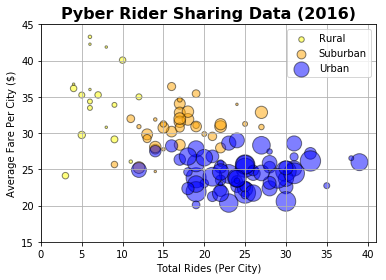

<Figure size 432x288 with 0 Axes>

In [300]:
plt.scatter(x_axis2, y_axis2, linewidth=0, marker="o", color="yellow", alpha=0.5, s=size2*6, edgecolor="black", label="Rural", lw=1)
plt.scatter(x_axis3, y_axis3, linewidth=0, marker="o", color="orange", alpha=0.5, s=size3*6, edgecolor="black", label="Suburban", lw=1)
plt.scatter(x_axis1, y_axis1, linewidth=0, marker="o", color="blue", alpha=0.5, s=size1*6, edgecolor="black", label="Urban", lw=1)
plt.xlim(0, 41)
plt.ylim(15, 45)
plt.xlabel("Total Rides (Per City)")
plt.ylabel("Average Fare Per City ($)")
plt.title("Pyber Rider Sharing Data (2016)", fontsize=16, fontweight="bold")
plt.legend()
plt.grid()
plt.show()
plt.savefig("Images/Pyber Rider Sharing Data 2016.png")

In [301]:
pie_chart_fares=merged_dataset.groupby(["type"]).sum()["fare"]

In [302]:
labels = ["Rural", "Suburban", "Urban"]
fares = [pie_chart_fares[0], pie_chart_fares[1], pie_chart_fares[2]]

In [303]:
colors = ["yellow", "blue", "red"]
explode = (0, 0, 0.1)

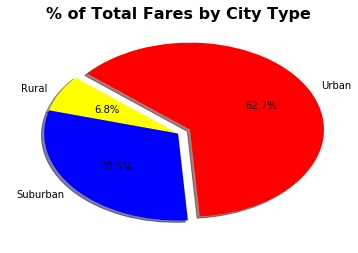

<Figure size 432x288 with 0 Axes>

In [304]:
plt.pie(fares, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type", fontsize=16, fontweight="bold")
plt.show()
plt.savefig("Images/% of Total Fares by City Type.png")

In [305]:
pie_chart_rides=merged_dataset.groupby(["type"]).count()["fare"]

In [306]:
labels = ["Rural", "Suburban", "Urban"]
rides = [pie_chart_rides[0], pie_chart_rides[1], pie_chart_rides[2]]

In [307]:
colors = ["yellow", "blue", "red"]
explode = (0, 0, 0.1)

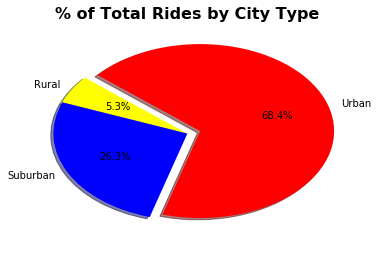

<Figure size 432x288 with 0 Axes>

In [308]:
plt.pie(rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type", fontsize=16, fontweight="bold")
plt.show()
plt.savefig("Images/% of Total Rides by City Type.png")

In [309]:
pie_chart_drivers=city_data.groupby(["type"]).sum()["driver_count"]

In [310]:
labels = ["Rural", "Suburban", "Urban"]
drivers = [pie_chart_drivers[0], pie_chart_drivers[1], pie_chart_drivers[2]]

In [311]:
colors = ["yellow", "blue", "red"]
explode = (0, 0, 0.1)

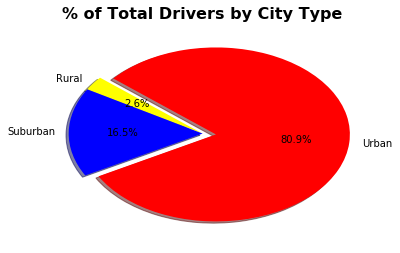

<Figure size 432x288 with 0 Axes>

In [312]:
plt.pie(drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type", fontsize=16, fontweight="bold")
plt.show()
plt.savefig("Images/% of Total Drivers by City Type.png")